In [ ]:
import random as rd
import pandas as pd
import math

Variant = 20
rd.seed(Variant)

set_operations = ['-','+','*','/']
set_operands = ['a', 'b', 'c']
count_operations = rd.randint(3,5)

expression = set_operands[rd.randint(0,len(set_operands)-1)]
for i in range(count_operations):
    current_operation = set_operations[rd.randint(0,len(set_operations)-1)]
    current_operand = set_operands[rd.randint(0,len(set_operands)-1)]
    expression = "(" + expression + current_operation + current_operand + ")"
expression

'(((((c+b)-b)+a)/b)-a)'

# file.asm (изменен)



```
;Function exit
exit:
    mov rax,1
    mov rbx,0
    int 0x80

;The function finds the length of a string
;input rax - place of memory of begin string
;output rax - length of the string
len_str:
  push rdx
  mov rdx, rax
  .iter:
      cmp byte [rax], 0
      je .next
      inc rax
      jmp .iter
  .next:
     sub rax, rdx
     pop rdx
     ret


;The function makes new line
new_line:
   push rax
   push rdi
   push rsi
   push rdx
   push rcx
   mov rax, 0xA
   push rax
   mov rdi, 1
   mov rsi, rsp
   mov rdx, 1
   mov rax, 1
   syscall
   pop rax
   pop rcx
   pop rdx
   pop rsi
   pop rdi
   pop rax
   ret

;The function prints minus
print_minus:
   push rax
   push rdi
   push rsi
   push rdx
   push rcx
   mov rax, '-'
   push rax
   mov rdi, 1
   mov rsi, rsp
   mov rdx, 1
   mov rax, 1
   syscall
   pop rax
   pop rcx
   pop rdx
   pop rsi
   pop rdi
   pop rax
   ret

;Function converting the string to the number
;input rsi - place of memory of begin string
;output rax - the number from the string
str_number:
    push rcx
    push rbx
    xor rcx,rcx
    xor r8, r8
    cmp byte [rsi], '-'
    jne     .loop
    mov     r8, 1
    inc     rcx
.loop:
    xor     rbx, rbx
    mov     bl, byte [rsi+rcx]
    cmp     bl, 48
    jl      .finished
    cmp     bl, 57
    jg      .finished

    sub     bl, 48
    add     rax, rbx
    mov     rbx, 10
    mul     rbx
    inc     rcx
    jmp     .loop

.finished:
    cmp     rcx, 0
    je .restore
    mov     rbx, 10
    div     rbx
    
.restore:
    pop rbx
    pop rcx
    cmp r8, 1
    jne .end
    neg rax
.end:
ret

;Function printing of string
;input rsi - place of memory of begin string
print_str:
    push rax
    push rdi
    push rdx
    push rcx
    push rbx
    mov rax, rsi
    call len_str
    mov rdx, rax
    mov rax, 1
    mov rdi, 1
    syscall
    pop rbx
    pop rcx
    pop rdx
    pop rdi
    pop rax
    ret

;Function printing of char
;input rax - char
print_char:
    push rdi
    push rsi
    push rdx
    push rcx
    push rbx
    push rax
    mov rsi, rsp
    mov rdx, 1
    mov rax, 1
    mov rdi, 1
    syscall
    pop rax
    pop rbx
    pop rcx
    pop rdx
    pop rsi
    pop rdi
    ret

;Function printing of number
;input rax - place of memory of number
print_num:
    push rsi
    push rdi
    push rdx
    push rcx
    push rbx
    push rax
    cmp rax, 0
    jnl @f
    call print_minus
    neg rax
    @@:
    xor rbx, rbx
    mov rbx, 10
    xor rcx, rcx
    .div_loop:
        xor rdx, rdx
        div rbx
        add rdx, '0'
        push rdx
        inc rcx
        cmp rax, 0
        jne .div_loop
    .print_loop:
        xor rax, rax
        pop rax
        call print_char
        dec rcx
        cmp rcx, 0
        jne .print_loop
    pop rax
    pop rbx
    pop rcx
    pop rdx
    pop rdi
    pop rsi
    ret
```



# #1



```
format ELF64

public _start

include 'file.asm'

_start:
mov rsi, [rsp+16]
mov al, byte [rsi]
mov bl, 10
xor rcx, rcx
.iter:
    xor ah, ah
    div bl
    add ah, '0'
    mov dl, ah
    push rdx
    inc cl
    cmp al, 0
    jne .iter
.iter2:
    pop rdx
    mov [rsi], dl
    call print_char
    dec cl
    cmp cl, 0
    jne .iter2
call new_line
call exit
```



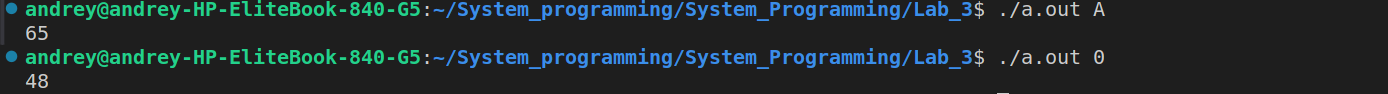

# #2



```
format ELF64

public _start

include 'file.asm'

section '.bss' writable
a dq ?
b dq ?
c dq ?

section '.text' executable
_start:
    xor rax, rax
    mov rsi, [rsp+16]
    call str_number
    mov [a], rax
    xor rax, rax
    mov rsi, [rsp+24]
    call str_number
    mov [b], rax
    xor rax, rax
    mov rsi, [rsp+32]
    call str_number
    mov [c], rax

    ;(c+b-b+a)/b-a
    xor rax, rax
    mov rax, [c]
    add rax, [b]
    sub rax, [b]
    add rax, [a]
    cqo
    idiv [b]
    sub rax, [a]
    call print_num
    call new_line
    call exit

```



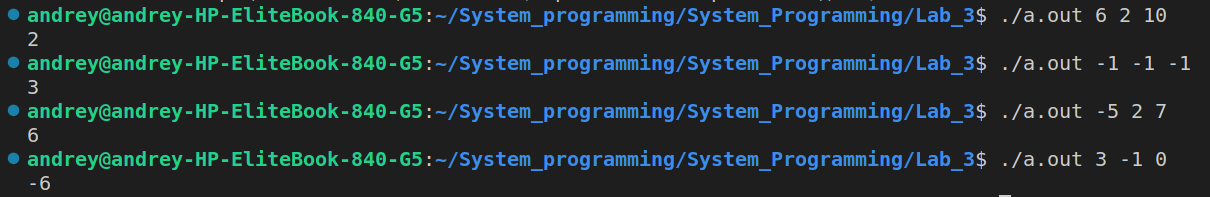

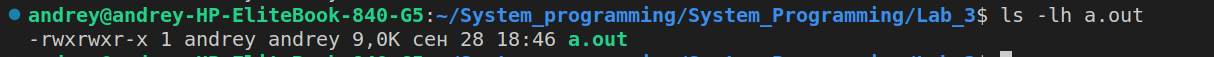

# #3



```
#include <stdio.h>
#include <stdlib.h>

int main (int argc, char* argv[]){
    int a = strtol(argv[1], NULL, 10);
    int b = strtol(argv[2], NULL, 10);
    int c = strtol(argv[3], NULL, 10);

    // (c+b-b+a)/b-a
    int result = 0;
    result += c + b - b + a;
    result /= b;
    result -= a;
    printf("%d\n", result);
    return 0;
}
```



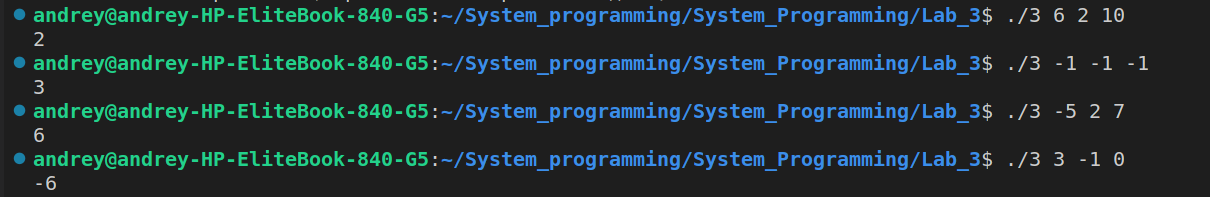

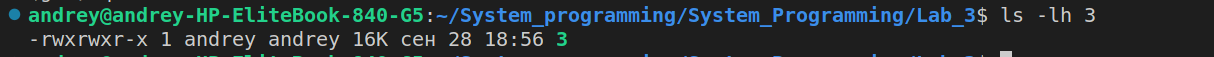